In [1]:
import tensorflow as tf
print(f"Tensor Flow Version: {tf.__version__}")

Tensor Flow Version: 2.16.1


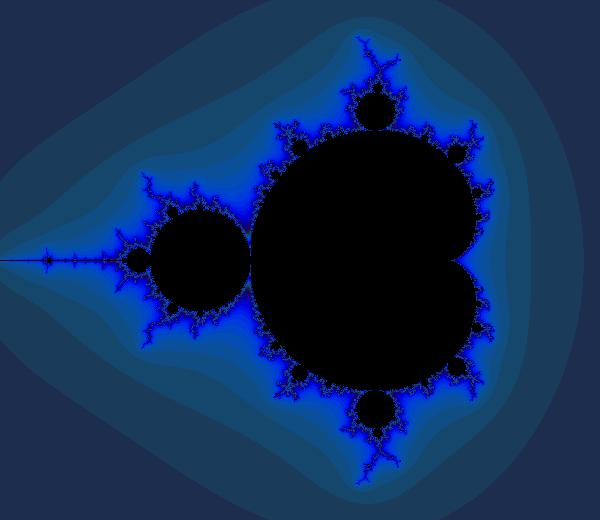

In [2]:
import tensorflow as tf
import numpy as np

import PIL.Image
from io import BytesIO
from IPython.display import Image,display

def DisplayFractal (a,fmt='jpeg'):
    """Display an array of iteration counts as a 
    colorful picture of a fractal."""
    a_cyclic=(6.28*a/20.0).reshape(list(a.shape)+[1])
    img=np.concatenate([10+20*np.cos(a_cyclic),
                        30+50*np.sin(a_cyclic),
                        155-80*np.cos(a_cyclic)],2)
    img[a==a.max()]=0
    a=img
    a=np.uint8(np.clip(a,0,255))
    f=BytesIO()
    PIL.Image.fromarray(a).save(f,fmt)
    display(Image(data=f.getvalue()))

Y,X=np.mgrid[-1.3:1.3:0.005,-2:1:0.005]
Z=X+1j*Y

xs=tf.constant(Z.astype(np.complex64))
zs=tf.Variable(xs)
ns=tf.Variable(tf.zeros_like(xs,tf.float32))

for i in range (200):
    zs_=zs*zs+xs
    not_diverged=tf.abs(zs_)<4

    zs.assign(zs_),
    ns.assign_add(tf.cast(not_diverged,tf.float32))

DisplayFractal(ns.numpy())



In [3]:
import tensorflow as tf
matrix1=tf.constant([[3.,3.]])

matrix2=tf.constant([[2.],[2.]])

product=tf.matmul(matrix1,matrix2)

print(product)
print(float(product))

tf.Tensor([[12.]], shape=(1, 1), dtype=float32)
12.0


In [4]:
import tensorflow as tf
x=tf.Variable([1.0,2.0])
a=tf.constant([3.0,3.0])

sub=tf.subtract(x,a)
print(sub)
print(sub.numpy())

tf.Tensor([-2. -1.], shape=(2,), dtype=float32)
[-2. -1.]


In [5]:
x.assign([4.0,6.0])

<tf.Variable 'UnreadVariable' shape=(2,) dtype=float32, numpy=array([4., 6.], dtype=float32)>

In [6]:
sub=tf.subtract(x,a)
print(sub)
print(sub.numpy())

tf.Tensor([1. 3.], shape=(2,), dtype=float32)
[1. 3.]


In [7]:
from keras.layers import Dense, Activation
import pandas as pd
import io
import os
import requests
import numpy as np
from sklearn import metrics

df=pd.read_csv("https://data.heatonresearch.com/data/t81-558/auto-mpg.csv",
               na_values=['NA','?'])

cars=df['name']

df['horsepower']=df['horsepower'].fillna(df['horsepower'].median())

x=df[[ 'cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'year', 'origin']].values
y=df['mpg'].values



In [8]:
import keras.models as models

In [16]:
# Build the neural network
model = models.Sequential()
model.add(Dense(25, input_dim=x.shape[1], activation='relu')) # Hidden 1
model.add(Dense(10, activation='relu')) # Hidden 2
model.add(Dense(1)) # Output
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(x,y,verbose=2,epochs=100)

Epoch 1/100


C:\Users\HP\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


13/13 - 1s - 60ms/step - loss: 32621.4043
Epoch 2/100
13/13 - 0s - 3ms/step - loss: 1547.5449
Epoch 3/100
13/13 - 0s - 3ms/step - loss: 1052.9381
Epoch 4/100
13/13 - 0s - 3ms/step - loss: 378.6537
Epoch 5/100
13/13 - 0s - 3ms/step - loss: 258.0913
Epoch 6/100
13/13 - 0s - 3ms/step - loss: 216.9314
Epoch 7/100
13/13 - 0s - 3ms/step - loss: 202.3978
Epoch 8/100
13/13 - 0s - 3ms/step - loss: 196.4886
Epoch 9/100
13/13 - 0s - 4ms/step - loss: 196.6173
Epoch 10/100
13/13 - 0s - 3ms/step - loss: 191.2020
Epoch 11/100
13/13 - 0s - 4ms/step - loss: 189.9096
Epoch 12/100
13/13 - 0s - 4ms/step - loss: 187.0247
Epoch 13/100
13/13 - 0s - 4ms/step - loss: 184.4581
Epoch 14/100
13/13 - 0s - 4ms/step - loss: 183.7407
Epoch 15/100
13/13 - 0s - 4ms/step - loss: 179.7477
Epoch 16/100
13/13 - 0s - 4ms/step - loss: 176.2159
Epoch 17/100
13/13 - 0s - 4ms/step - loss: 174.3579
Epoch 18/100
13/13 - 0s - 4ms/step - loss: 171.1935
Epoch 19/100
13/13 - 0s - 5ms/step - loss: 169.7130
Epoch 20/100
13/13 - 0s - 4m

In [17]:
pred = model.predict(x)
print(f"Shape: {pred.shape}")
print(pred[0:10])

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
Shape: (398, 1)
[[12.648547]
 [14.875567]
 [14.94723 ]
 [17.351963]
 [14.980891]
 [13.002566]
 [14.015742]
 [14.640193]
 [15.63853 ]
 [14.357509]]


In [18]:
# Measure RMSE error.  RMSE is common for regression.
score = np.sqrt(metrics.mean_squared_error(pred,y))
print(f"Final score (RMSE): {score}")

Final score (RMSE): 7.108330260839657


In [19]:
# Sample predictions
for i in range(10):
    print(f"{i+1}. Car name: {cars[i]}, MPG: {y[i]}, " 
          + f"predicted MPG: {pred[i]}")

1. Car name: chevrolet chevelle malibu, MPG: 18.0, predicted MPG: [12.648547]
2. Car name: buick skylark 320, MPG: 15.0, predicted MPG: [14.875567]
3. Car name: plymouth satellite, MPG: 18.0, predicted MPG: [14.94723]
4. Car name: amc rebel sst, MPG: 16.0, predicted MPG: [17.351963]
5. Car name: ford torino, MPG: 17.0, predicted MPG: [14.980891]
6. Car name: ford galaxie 500, MPG: 15.0, predicted MPG: [13.002566]
7. Car name: chevrolet impala, MPG: 14.0, predicted MPG: [14.015742]
8. Car name: plymouth fury iii, MPG: 14.0, predicted MPG: [14.640193]
9. Car name: pontiac catalina, MPG: 14.0, predicted MPG: [15.63853]
10. Car name: amc ambassador dpl, MPG: 15.0, predicted MPG: [14.357509]


In [21]:
import pandas as pd
import io
import requests
import numpy as np
from sklearn import metrics
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.callbacks import EarlyStopping

df=pd.read_csv(
    "https://data.heatonresearch.com/data/t81-558/iris.csv",
    na_values=['NA','?'])

x=df[['sepal_l','sepal_w','petal_l','petal_w']].values
display(x[1:10])
dummies=pd.get_dummies(df['species'])
display(dummies[0:10])
species=dummies.columns
display(species[0:10])
y=dummies.values
display(y[0:10])

array([[4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1]])

,Iris-setosa,Iris-versicolor,Iris-virginica
0,True,False,False
1,True,False,False
2,True,False,False
3,True,False,False
4,True,False,False
5,True,False,False
6,True,False,False
7,True,False,False
8,True,False,False
9,True,False,False


Index(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype='object')

array([[ True, False, False],
       [ True, False, False],
       [ True, False, False],
       [ True, False, False],
       [ True, False, False],
       [ True, False, False],
       [ True, False, False],
       [ True, False, False],
       [ True, False, False],
       [ True, False, False]])

In [22]:
model=Sequential()
model.add(Dense(50,input_dim=x.shape[1],activation='relu'))
model.add(Dense(25,activation='relu'))
model.add(Dense(y.shape[1],activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam')
model.fit(x,y,verbose=2,epochs=100)

Epoch 1/100


C:\Users\HP\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


5/5 - 1s - 186ms/step - loss: 1.3769
Epoch 2/100
5/5 - 0s - 11ms/step - loss: 1.1806
Epoch 3/100
5/5 - 0s - 10ms/step - loss: 1.0861
Epoch 4/100
5/5 - 0s - 9ms/step - loss: 1.0037
Epoch 5/100
5/5 - 0s - 7ms/step - loss: 0.9381
Epoch 6/100
5/5 - 0s - 8ms/step - loss: 0.8736
Epoch 7/100
5/5 - 0s - 7ms/step - loss: 0.8222
Epoch 8/100
5/5 - 0s - 6ms/step - loss: 0.7819
Epoch 9/100
5/5 - 0s - 7ms/step - loss: 0.7447
Epoch 10/100
5/5 - 0s - 7ms/step - loss: 0.7064
Epoch 11/100
5/5 - 0s - 7ms/step - loss: 0.6732
Epoch 12/100
5/5 - 0s - 7ms/step - loss: 0.6422
Epoch 13/100
5/5 - 0s - 8ms/step - loss: 0.6133
Epoch 14/100
5/5 - 0s - 7ms/step - loss: 0.5876
Epoch 15/100
5/5 - 0s - 7ms/step - loss: 0.5638
Epoch 16/100
5/5 - 0s - 8ms/step - loss: 0.5409
Epoch 17/100
5/5 - 0s - 9ms/step - loss: 0.5210
Epoch 18/100
5/5 - 0s - 8ms/step - loss: 0.4995
Epoch 19/100
5/5 - 0s - 8ms/step - loss: 0.4793
Epoch 20/100
5/5 - 0s - 8ms/step - loss: 0.4577
Epoch 21/100
5/5 - 0s - 8ms/step - loss: 0.4416
Epoch 22/

In [23]:
print(species)

Index(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype='object')


In [25]:
pred=model.predict(x)
print(f"Shape: {pred.shape}")
print(pred)

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
Shape: (150, 3)
[[9.96854365e-01 3.14562628e-03 2.01024974e-09]
 [9.93532896e-01 6.46714680e-03 1.22821868e-08]
 [9.95000541e-01 4.99944715e-03 9.12638765e-09]
 [9.91640925e-01 8.35900567e-03 3.17826547e-08]
 [9.96969283e-01 3.03074112e-03 2.05605932e-09]
 [9.96617377e-01 3.38265765e-03 2.03656358e-09]
 [9.94655132e-01 5.34493476e-03 1.45939989e-08]
 [9.95787680e-01 4.21228027e-03 4.62640948e-09]
 [9.89847839e-01 1.01520279e-02 6.32755217e-08]
 [9.94261622e-01 5.73837850e-03 8.91957530e-09]
 [9.97646391e-01 2.35358207e-03 7.43534179e-10]
 [9.94169235e-01 5.83081320e-03 1.18403038e-08]
 [9.94114995e-01 5.88493096e-03 1.06461702e-08]
 [9.94160354e-01 5.83963189e-03 1.70626695e-08]
 [9.98916984e-01 1.08303351e-03 5.09363905e-11]
 [9.98761177e-01 1.23878429e-03 1.27522770e-10]
 [9.97977555e-01 2.02249316e-03 5.31242050e-10]
 [9.96430755e-01 3.56926071e-03 2.96556757e-09]
 [9.97317016e-01 2.68302928e-03 7.53330898e-10]
 [9.97155428e-01 2.84452690e-03 1.

In [26]:
np.set_printoptions(suppress=True)

In [27]:
print(y[0:10])

[[ True False False]
 [ True False False]
 [ True False False]
 [ True False False]
 [ True False False]
 [ True False False]
 [ True False False]
 [ True False False]
 [ True False False]
 [ True False False]]


In [28]:
predict_classes = np.argmax(pred,axis=1)
expected_classes = np.argmax(y,axis=1)
print(f"Predictions: {predict_classes}")
print(f"Expected: {expected_classes}")

Predictions: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1
 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]
Expected: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [29]:
print(species[predict_classes[1:10]])


Index(['Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa'],
      dtype='object')


In [30]:
from sklearn.metrics import accuracy_score

correct=accuracy_score(expected_classes,predict_classes)
print(f"Accuracy: {correct}")

Accuracy: 0.9866666666666667


In [31]:
sample_flower = np.array( [[5.0,3.0,4.0,2.0]], dtype=float)
pred = model.predict(sample_flower)
print(pred)
pred = np.argmax(pred)
print(f"Predict that {sample_flower} is: {species[pred]}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
[[0.00036277 0.23298742 0.7666499 ]]
Predict that [[5. 3. 4. 2.]] is: Iris-virginica


In [32]:
sample_flower = np.array( [[5.0,3.0,4.0,2.0],[5.2,3.5,1.5,0.8]],\
        dtype=float)
pred = model.predict(sample_flower)
print(pred)
pred = np.argmax(pred,axis=1)
print(f"Predict that these two flowers {sample_flower} ")
print(f"are: {species[pred]}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
[[0.00036277 0.2329874  0.7666499 ]
 [0.9895096  0.01049038 0.00000003]]
Predict that these two flowers [[5.  3.  4.  2. ]
 [5.2 3.5 1.5 0.8]] 
are: Index(['Iris-virginica', 'Iris-setosa'], dtype='object')
